# Chapter 3 Answers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1

In [113]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):

  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x


  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  w_act_1 = act_1 * phi_1
  w_act_2 = act_2 * phi_2
  w_act_3 = act_3 * phi_3

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()


In [4]:
# Define activation functipns

def ReLU(preactivation):
    activation = preactivation.clip(min=0)
    return activation

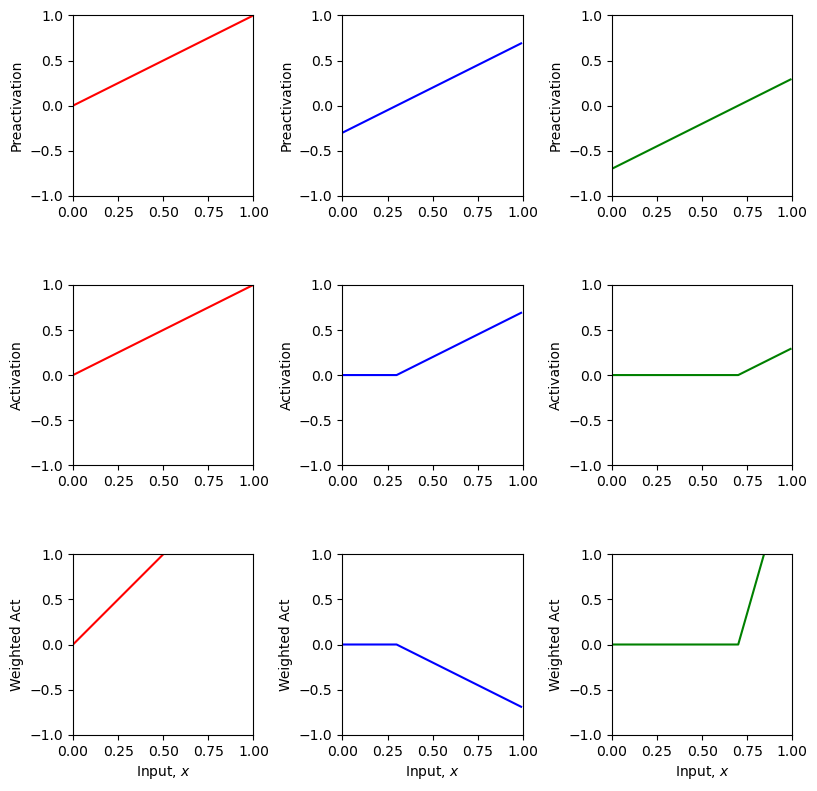

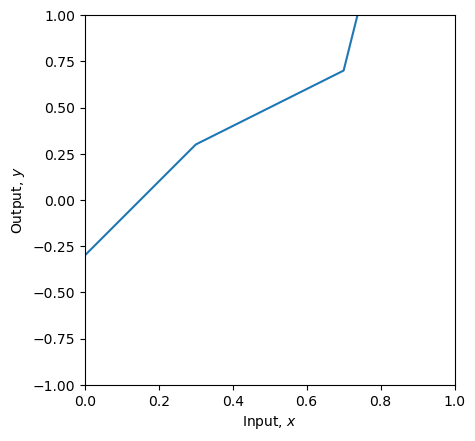

In [7]:
# Now lets define some parameters and run the neural network
theta_10 =  0 ; theta_11 = 1.0
theta_20 = -0.3  ; theta_21 = 1
theta_30 = -0.7  ; theta_31 = 1
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

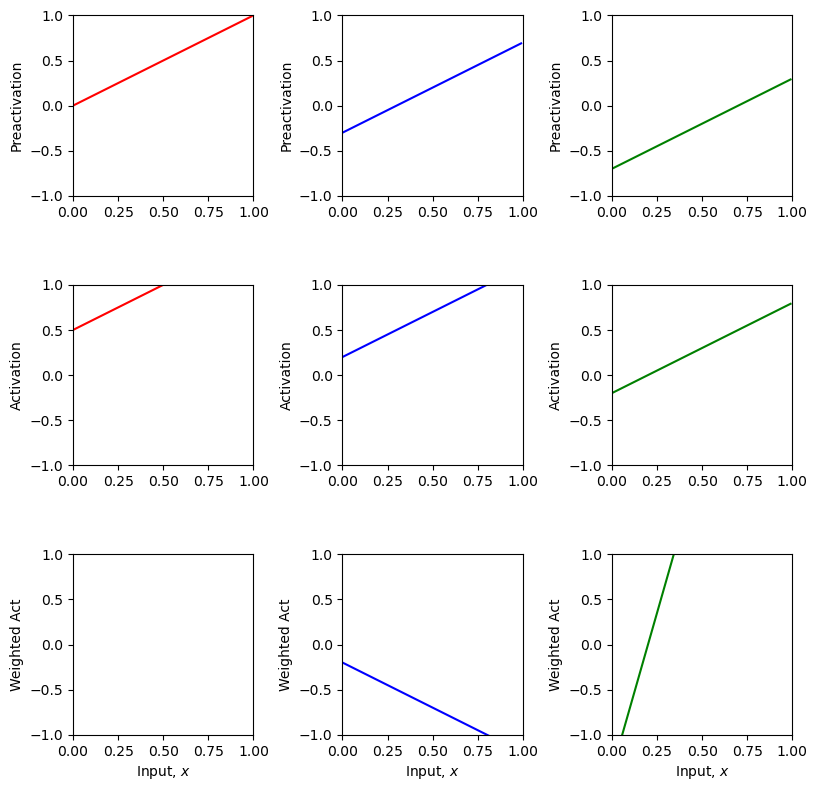

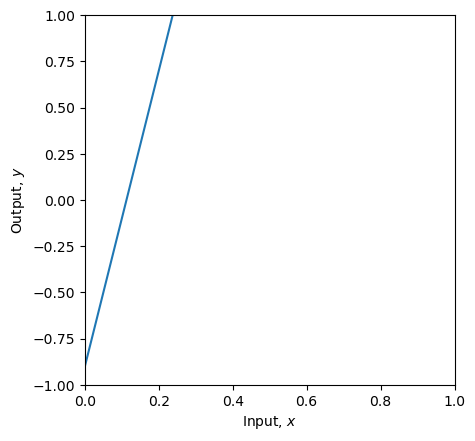

In [10]:
# Linear activation function a[z] = \phi_0 + \phi_1 z
def linear(preactivation, psi_0=0.5, psi_1=1.0):
    return psi_0 + psi_1 * preactivation

# Run model with same parameters as above
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, linear, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

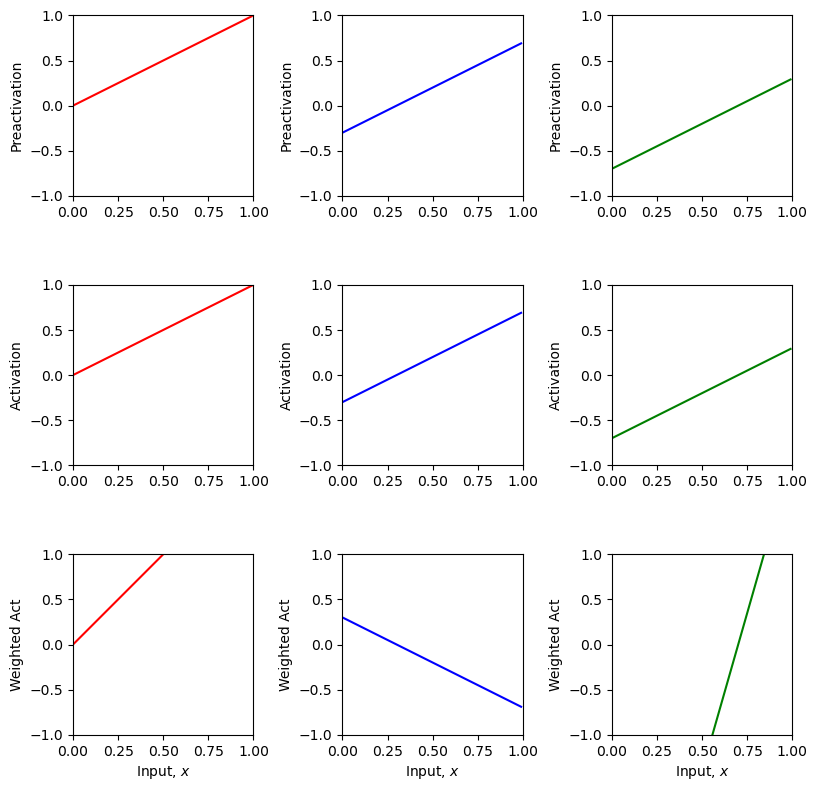

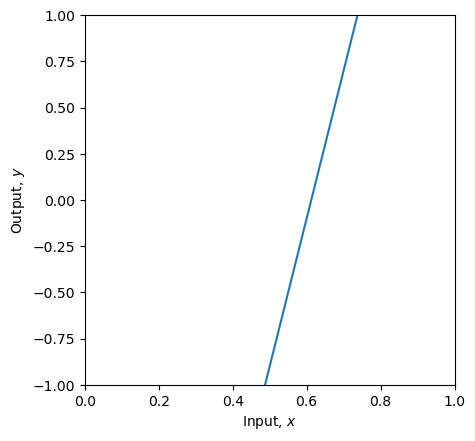

In [9]:
# With activation function removed so that a[z] = z

def no_activation(preactivation):
    return preactivation

# Run model with same parameters as above
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, no_activation, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

## 3.3

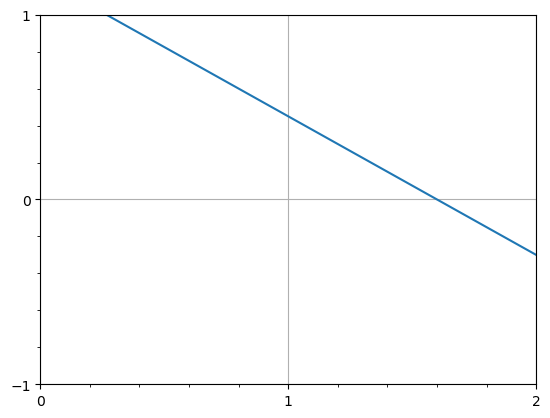

In [55]:
# Define plotting function which plots data between 0 and 2 on x and -1 and 1 on y

def plot_linear_function(slope, intercept):
    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Set the limits of x and y axes.
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 1)

    # Set the ticks for x and y axes.
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([-1, 0, 1])

    ax.set_xticks(np.arange(0, 2.1, 0.2), minor=True)
    ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)

    # Generate x values.
    x = np.linspace(0, 2, 400)

    # Calculate corresponding y values for the linear function.
    y = slope * x + intercept

    # Plot the function.
    ax.plot(x, y)

    # Set grid (optional)
    ax.grid(True)

    # Show the plot.
    plt.show()

# (slope, intercept)
plot_linear_function(-0.75, 1.2) 

## 3.4

Draw a version of figure 3.3 where the y-intercept and slope of the third hidden unit have changed as in figure 3.14c. Assume that the remaining parameters remain the same.

In [74]:
# Redefine plotting function to match textbook
def plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,2]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_xticks([0, 1, 2])
        ax[plot_y,plot_x].set_xticks(np.arange(0, 2.1, 0.2), minor=True)
        ax[plot_y,plot_x].set_yticks([-1, 0, 1])
        ax[plot_y,plot_x].set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
        # plot dashed line at y = 0
        ax[plot_y,plot_x].axhline(0, color='grey', lw=0.5, ls='--')
        ax[plot_y,plot_x].set_aspect(1)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,2]);ax.set_ylim([-1,1])
  ax.set_xticks([0, 1, 2])
  ax.set_xticks(np.arange(0, 2.1, 0.2), minor=True)
  ax.set_yticks([-1, 0, 1])
  ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
  ax.axhline(0, color='grey', lw=0.5, ls='--')
  ax.set_aspect(1)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

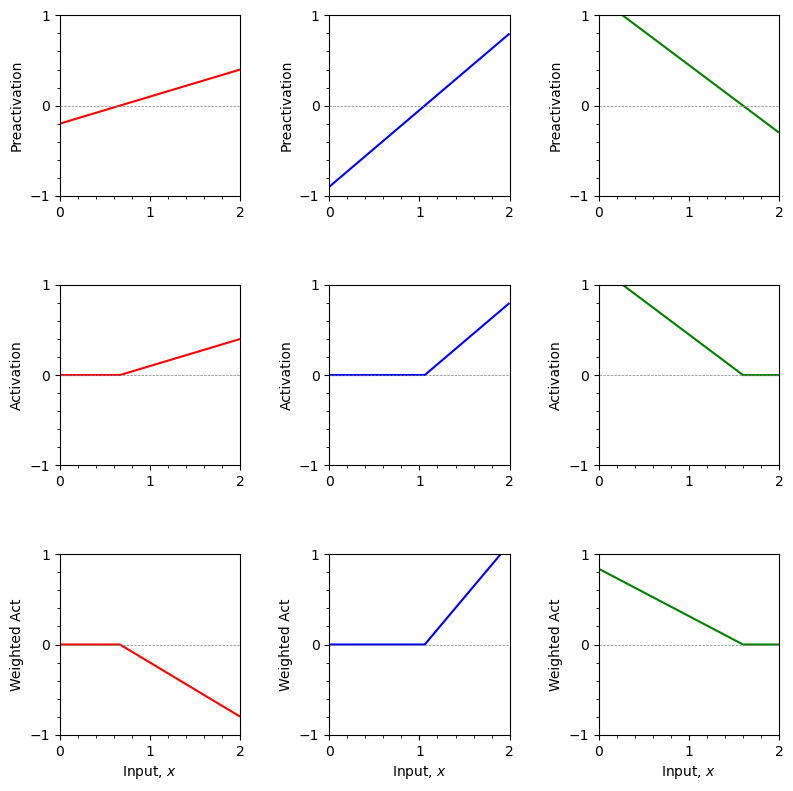

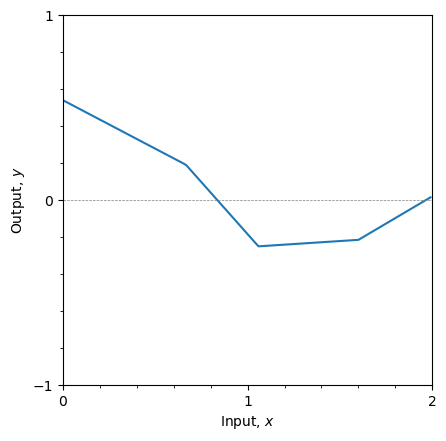

In [85]:
theta_10 =  -0.2 ; theta_11 = 0.3
theta_20 = -0.9  ; theta_21 = 0.85
theta_30 = 1.2  ; theta_31 = -0.75

phi_0 = -0.3; phi_1 = -2; phi_2 = 1.4; phi_3 = 0.7

# Define a range of input values
x = np.arange(0,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

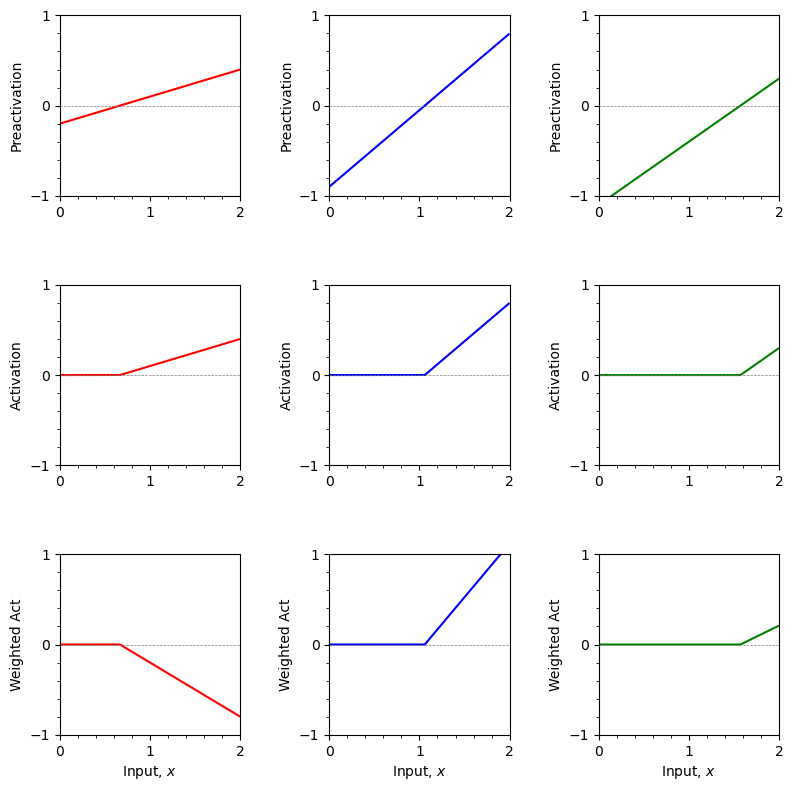

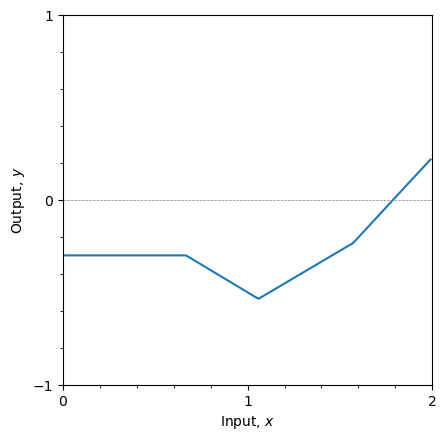

In [90]:
# Changing parameters of third hidden unit to match 3.14c

theta_10 =  -0.2 ; theta_11 = 0.3
theta_20 = -0.9  ; theta_21 = 0.85
theta_30 = -1.1  ; theta_31 = 0.7

phi_0 = -0.3; phi_1 = -2; phi_2 = 1.4; phi_3 = 0.7

# Define a range of input values
x = np.arange(0,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

## 3.5

In [102]:
def shallow_1_1_3_alpha(x, alpha, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  
  theta_10 = alpha * theta_10
  theta_11 = alpha * theta_11
  phi_1 = phi_1 / alpha

  pre_1 = theta_10 + theta_11*x
  pre_2 = theta_20 + theta_21*x
  pre_3 = theta_30 + theta_31*x


  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  w_act_1 = act_1 * phi_1
  w_act_2 = act_2 * phi_2
  w_act_3 = act_3 * phi_3

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

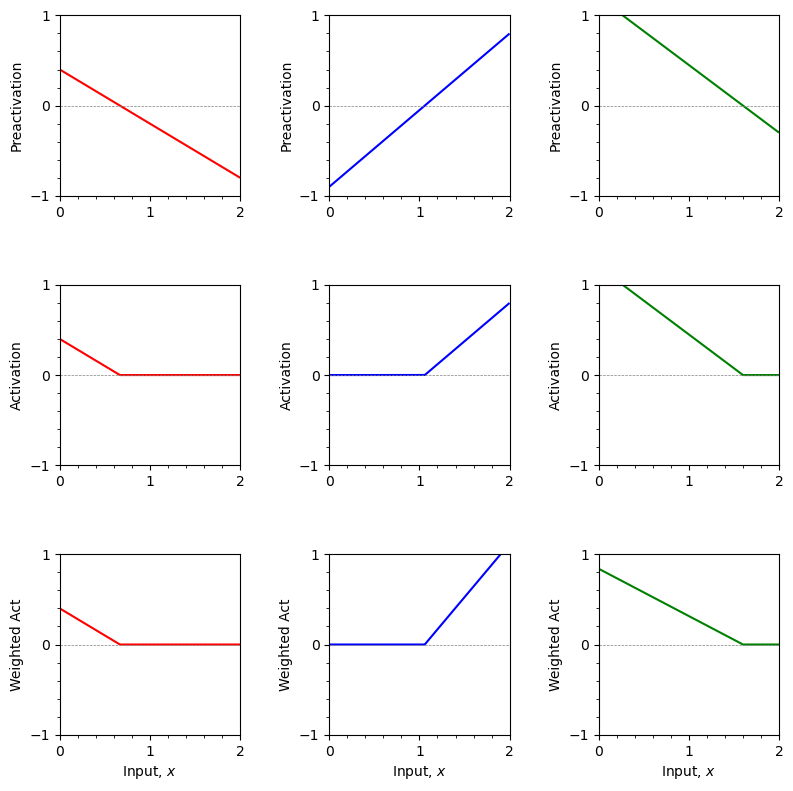

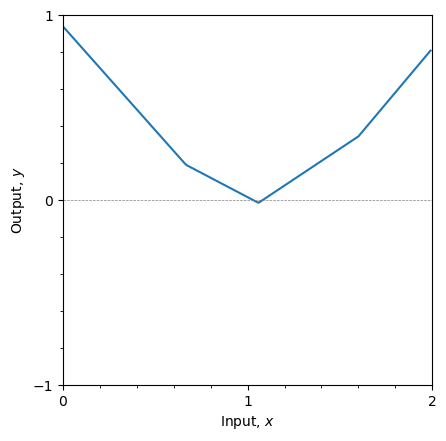

In [107]:
theta_10 =  -0.2 ; theta_11 = 0.3
theta_20 = -0.9  ; theta_21 = 0.85
theta_30 = 1.2  ; theta_31 = -0.75

phi_0 = -0.3; phi_1 = -2; phi_2 = 1.4; phi_3 = 0.7

alpha = -2

# Define a range of input values
x = np.arange(0,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3_alpha(x,alpha, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

## 3.8

In [122]:
# Define new activation functions

def heaviside(preactivation):
    return np.where(preactivation < 0, 0, 1)

def rect(preactivation):
    return np.where((0 <= preactivation) & (preactivation <= 1), 1, 0)

def tanh(preactivation):
    return np.tanh(preactivation)

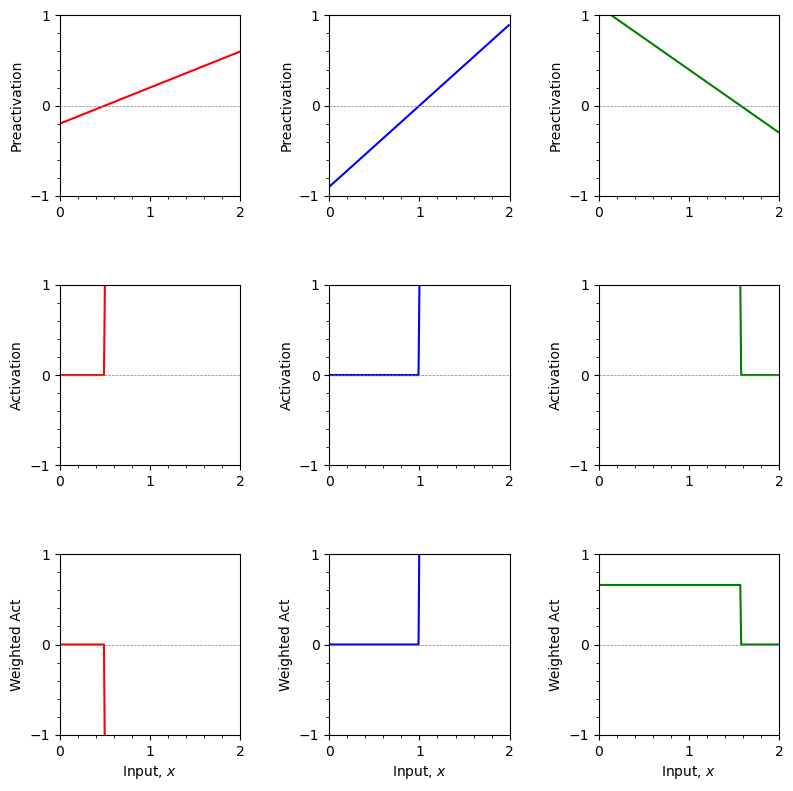

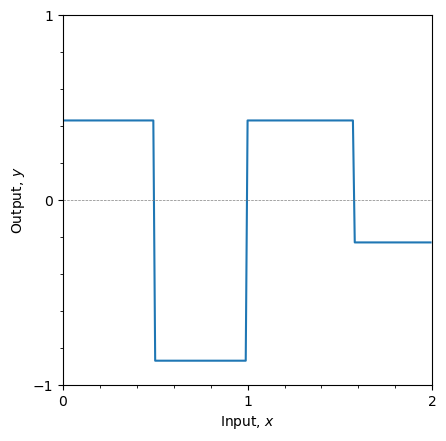

In [118]:
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7

phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

alpha = -2

# Define a range of input values
x = np.arange(0,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

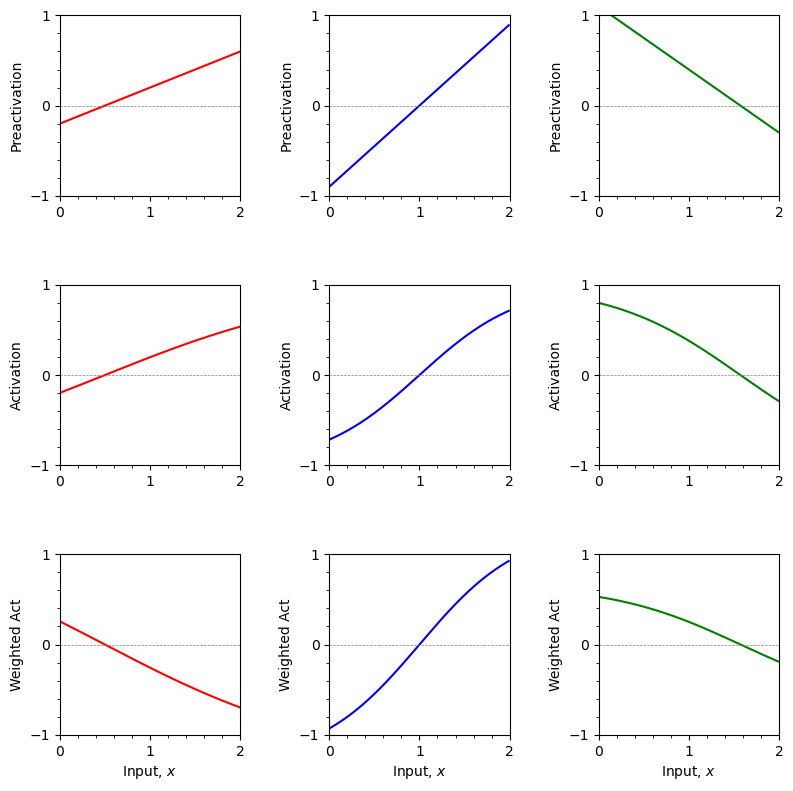

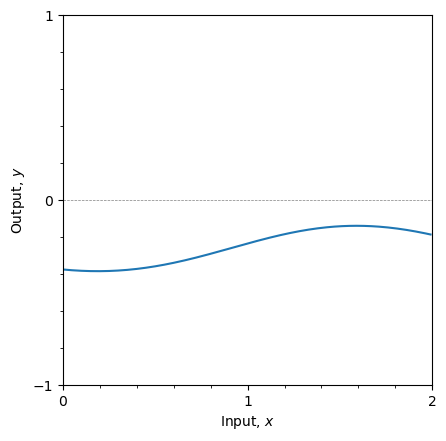

In [123]:
# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, tanh, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

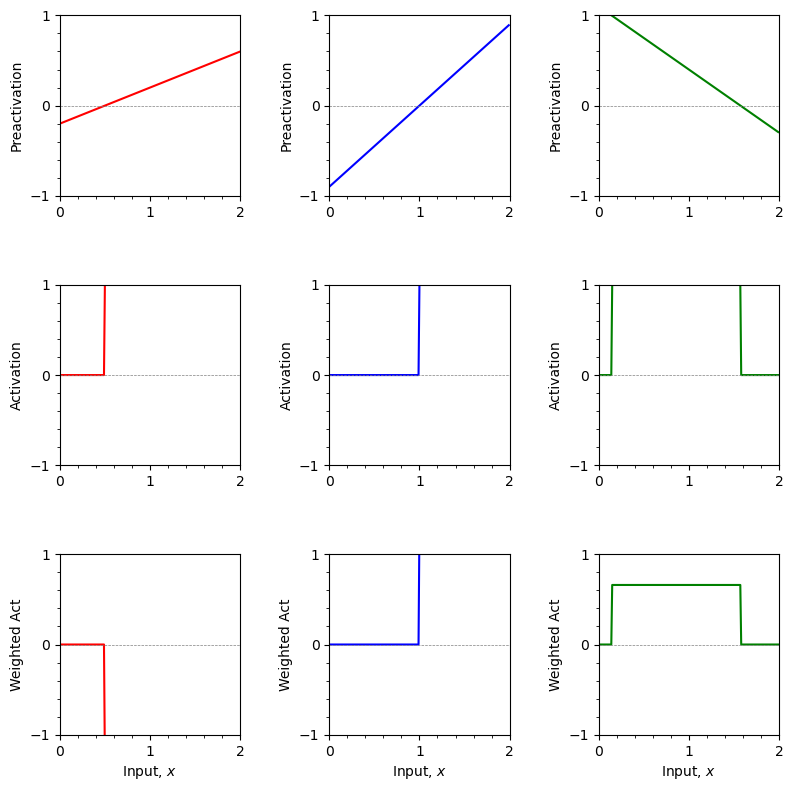

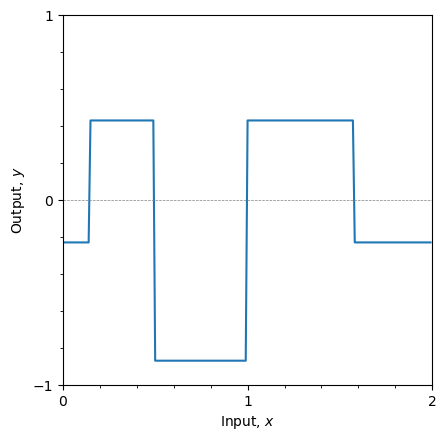

In [121]:
# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, rect, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Plot the results
plot_neural_textbook(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)